## PCA on the Iris dataset

We start by loading the Iris dataset from scikit-learn:

In [87]:
import sklearn.datasets
data,labels = sklearn.datasets.load_iris(return_X_y=True)

This dataset features three classes of Irises, with four variables describing each Iris example. 

We are going to plot the joint distribution of each pair of variables to see their correlations. To do this, the easiest is to use seaborn, which takes an input a pandas dataframe. 

So we create the pandas dataframe: 

In [88]:
import pandas as pd
df = pd.DataFrame(data, 
                  columns=['sepal_length',
                           'sepal_width',
                           'petal_length',
                           'petal_width'])
df['species'] = labels

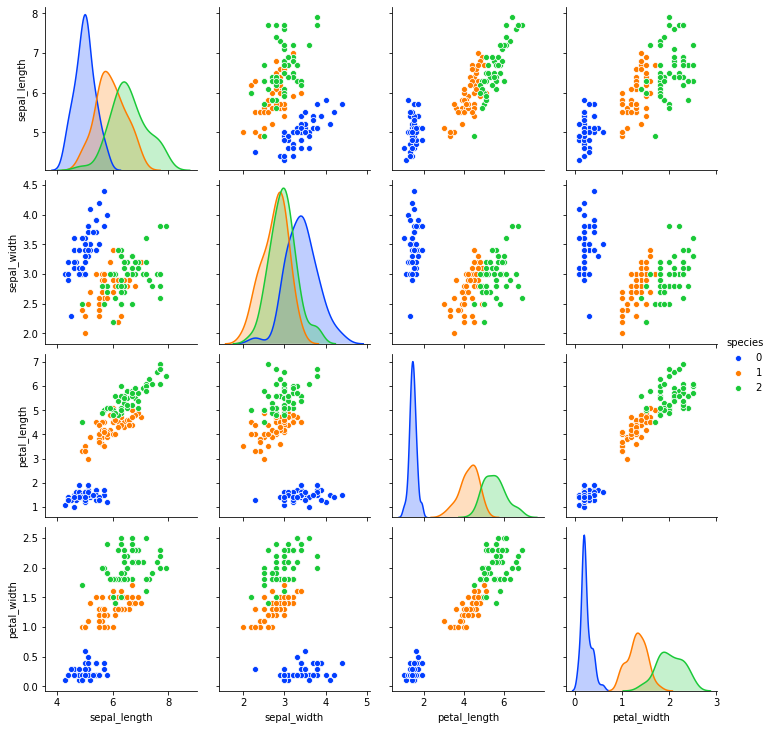

In [12]:
import seaborn as sns
sns.pairplot(df, hue="species", palette='bright');

In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
transform = pca.fit(data)

In [14]:
view = transform.transform(data)

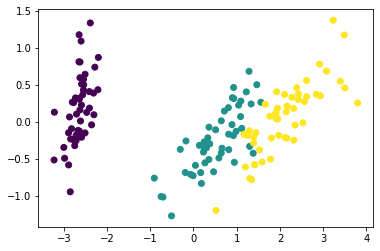

In [15]:
import matplotlib.pyplot as plt
plt.scatter(view[:,0], view[:,1], c=labels)

## Illustration of PCA on a simple 3D dataset

In [17]:
import sklearn.datasets
data, labels = sklearn.datasets.make_blobs(n_samples=1000, 
                                           n_features=3, 
                                           centers=[[0,0,0], [2,2,0], [0,0,5]])

Text(0, 0.5, 'y')

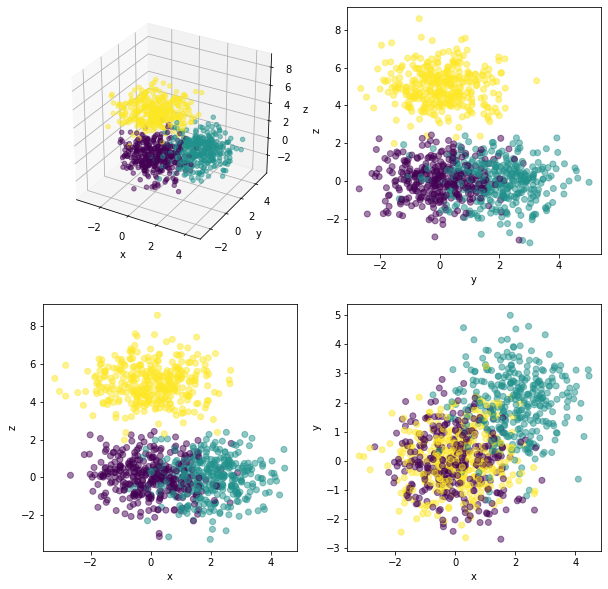

In [74]:
import mpl_toolkits.mplot3d.axes3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(222)
ax.scatter(data[:,1], data[:,2], c=labels, alpha=0.5)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax = fig.add_subplot(223)
ax.scatter(data[:,0], data[:,2], c=labels, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax = fig.add_subplot(224)
ax.scatter(data[:,0], data[:,1], c=labels, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')


In [80]:
transform = pca.fit(data)

In [81]:
view = transform.transform(data)
view.shape

(1000, 2)

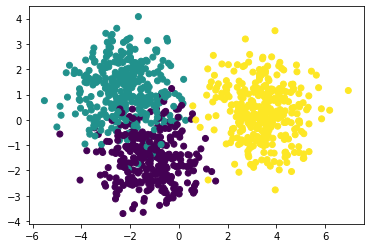

In [82]:
plt.scatter(view[:,0], view[:,1], c=labels)

In [85]:
transform.components_

array([[-0.24316016, -0.23696578,  0.94059575],
       [ 0.66601598,  0.66419623,  0.33950858]])

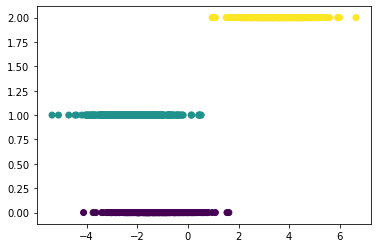

In [189]:
pca = decomposition.PCA(n_components=1)
view = pca.fit_transform(data)
plt.scatter(view, labels, c=labels)

## Iris

### Iris PCA

In [17]:
iris = sklearn.datasets.load_iris()
data = iris['data']
labels = iris['target']

In [18]:
data.shape

(150, 4)

In [19]:
np.unique(labels)

array([0, 1, 2])

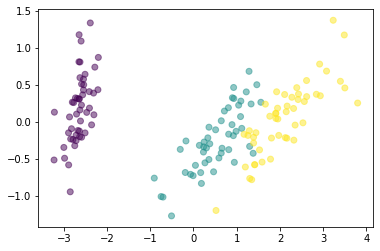

In [20]:
pca = decomposition.PCA(n_components=2)
pca.fit(data)
view = pca.transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)

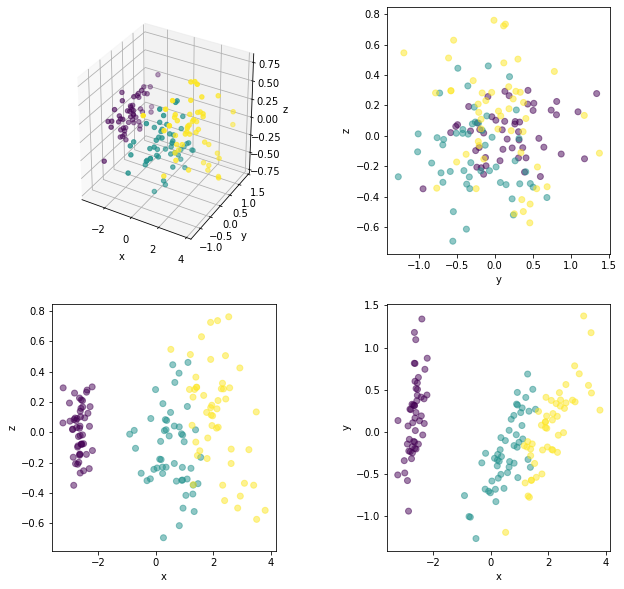

In [21]:
pca = decomposition.PCA(n_components=3)
pca.fit(data)
view = pca.transform(data)
plot_3d(view)

### Iris t-SNE

In [5]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2).fit_transform(data)

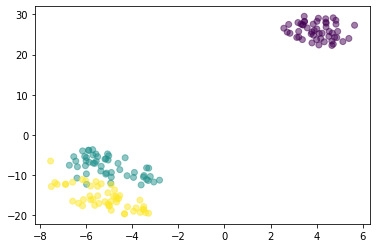

In [23]:
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)

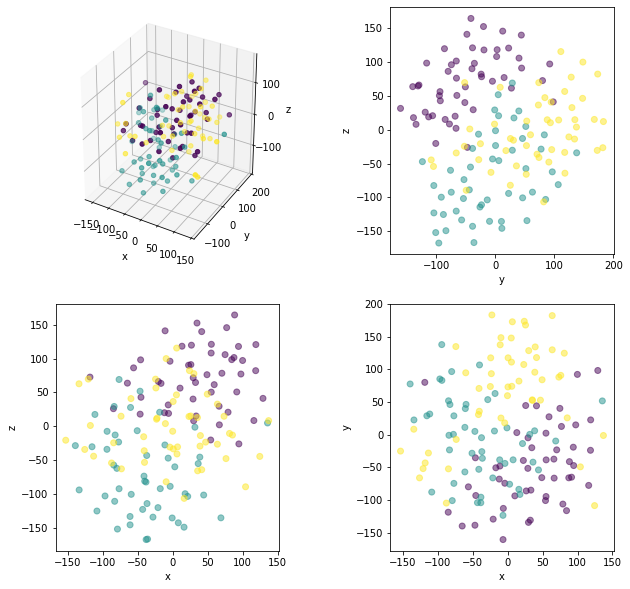

In [24]:
view = TSNE(n_components=3).fit_transform(data)
plot_3d(view)

## Wine


In [151]:
wine = sklearn.datasets.load_wine()
data = wine['data']
labels = wine['target']

### Wine PCA

Describe: 

* labels 
* features 

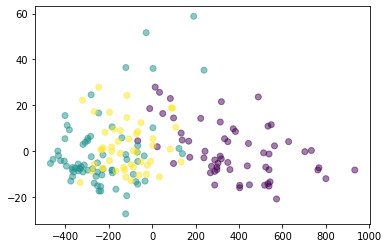

In [152]:
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)

### Wine t-SNE

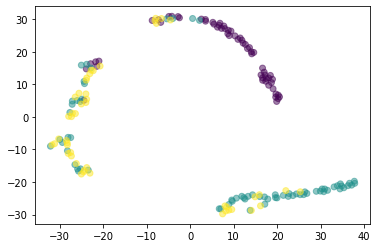

In [168]:
view = TSNE(n_components=2, perplexity=10).fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)

In [1]:
view = TSNE(n_components=2, perplexity=30).fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)

NameError: name 'TSNE' is not defined

We see that two categories are very different, and that one sits in the middle. 

Exercise: 

* tune perplexity

## MNIST

In [5]:
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

raw_data, raw_labels = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
raw_data.shape 

(70000, 784)

In [7]:
raw_labels.shape

(70000,)

In [8]:
nsamples = 5000
data = raw_data[:nsamples] / 255.
labels = raw_labels[:nsamples].astype('int')
images = data.reshape(data.shape[0], 28, 28)

In [9]:
data.max()

1.0

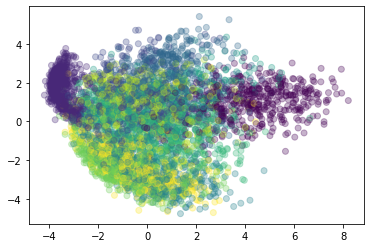

In [173]:
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

### t-SNE

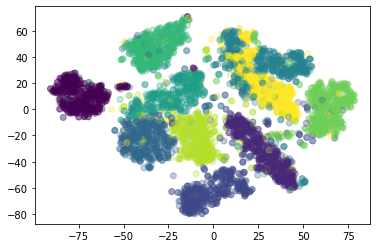

In [12]:
view = TSNE(n_components=2).fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

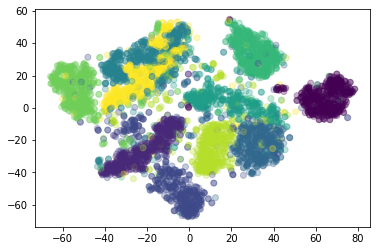

In [179]:
view = TSNE(n_components=2, perplexity=50).fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

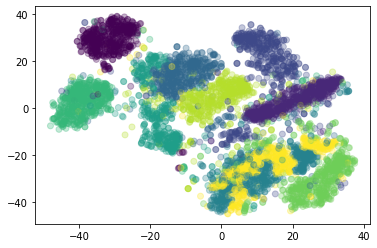

In [177]:
view = TSNE(n_components=2, perplexity=100).fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

* Discuss t-SNE complexity. 
* Mention dimensionality reduction with PCA before t-SNE and timeit
* Mention RAPIDS. Try it? 

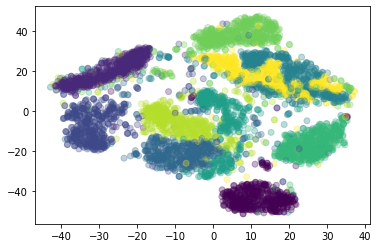

In [178]:
pca = decomposition.PCA(n_components=50)
inter_view = pca.fit_transform(data)
view = TSNE(n_components=2, perplexity=100).fit_transform(inter_view)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

## Bokeh / holoviews interactive visualization

In [10]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [13]:
import pandas as pd
import numpy as np
df = pd.DataFrame(view, columns=['x','y'])
df['label'] = labels.astype('str')
df

,x,y,label
0,-20.587196,3.215848,5
1,-72.935158,3.399606,0
2,15.279757,51.628384,4
3,43.294392,-49.811699,1
4,22.077286,17.552795,9
...,...,...,...
4995,66.842903,-9.986567,7
4996,-36.518818,-36.321991,3
4997,-2.539876,-62.020496,2
4998,26.771215,-26.547491,1


In [27]:
from bokeh.models import HoverTool
hover = HoverTool(
    tooltips = [('label','@label'),
               ('index', '$index')]
)
fig_scat = figure(tools=[hover, 'box_zoom', 'crosshair', 'undo'], 
                 plot_width=800)
source = ColumnDataSource(df)


In [28]:
from bokeh.transform import linear_cmap
from bokeh.palettes import Plasma256 as palette
mapper = linear_cmap('label', palette, 0, 10)

In [29]:
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper
palette = d3['Category10'][10]
cmap = CategoricalColorMapper(
    factors=df['label'].unique(),
    palette=palette
)


In [30]:
fig_scat.scatter(
    x='x', y='y', alpha=0.5, 
    color={'field': 'label', 'transform': cmap}, 
    source=source
)

GlyphRenderer(id='1347', ...)

In [31]:
from bokeh.layouts import row

In [32]:
show(fig_scat)

In [20]:
from bokeh.io import save
save(fig_scat, 'tsne_digits.png')

/Users/cbernet/anaconda2/envs/mlintro/lib/python3.7/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/cbernet/anaconda2/envs/mlintro/lib/python3.7/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/cbernet/Code/introduction_machine_learning/notebooks/tsne_digits.png'

In [111]:
def plot_images(indices): 
    if len(indices)>6:
        print('please provide at most 6 indices')
        return
    fig = plt.figure(dpi=150)
    for i, index in enumerate(indices):
        fig.add_subplot(2, 3, i+1)
        plt.imshow(images[index])
        plt.title(labels[index])

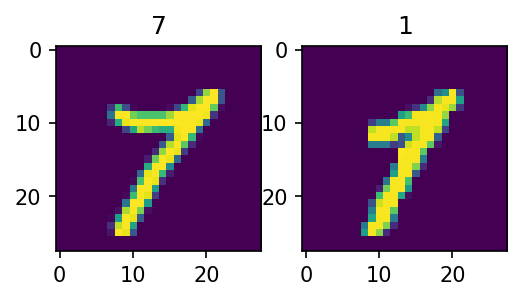

In [116]:
plot_images([2609, 2426])

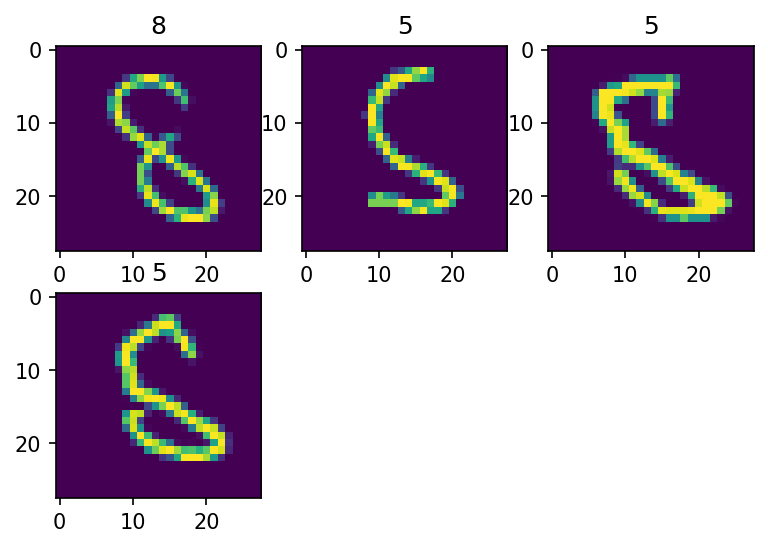

In [121]:
plot_images([5078, 4562, 2622, 9344])